## Real Estate Analysis Chicago

I will perform an analysis of the dataset to understand the price of houses in Chicago.

- <span style="color:red">**type**</span>: The type of property (e.g., single-family home, condo).
- <span style="color:red">**text**</span>: A textual description of the property.
- <span style="color:red">**year_built**</span>: The year in which the property was constructed.
- <span style="color:red">**beds**</span>: The number of bedrooms.
- <span style="color:red">**baths**</span>: Total number of bathrooms (including full and half).
- <span style="color:red">**baths_full**</span>: Number of full bathrooms.
- <span style="color:red">**baths_half**</span>: Number of half bathrooms.
- <span style="color:red">**garage**</span>: Garage capacity (number of cars).
- <span style="color:red">**lot_sqft**</span>: Size of the lot in square feet.
- <span style="color:red">**sqft**</span>: Living area size in square feet.
- <span style="color:red">**stories**</span>: Number of stories/floors in the property.
- <span style="color:red">**lastSoldPrice**</span>: The price at which the property was last sold.
- <span style="color:red">**soldOn**</span>: The date on which the property was last sold.
- <span style="color:red">**listPrice**</span>: The listing price of the property at the time of data collection.
- <span style="color:red">**status**</span>: The current status of the listing (e.g., for sale, sold).

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="color:green">PREPARING THE DATASET</span>

In [44]:
housedata = pd.read_csv("/Users/matteomontrucchio/Desktop/realestate_chicago.csv")
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           2000 non-null   object 
 1   text           1992 non-null   object 
 2   year_built     1790 non-null   float64
 3   beds           1940 non-null   float64
 4   baths          1999 non-null   float64
 5   baths_full     1937 non-null   float64
 6   baths_half     592 non-null    float64
 7   garage         1282 non-null   float64
 8   lot_sqft       992 non-null    float64
 9   sqft           1447 non-null   float64
 10  stories        1620 non-null   float64
 11  lastSoldPrice  1415 non-null   float64
 12  soldOn         1415 non-null   object 
 13  listPrice      1994 non-null   float64
 14  status         2000 non-null   object 
dtypes: float64(11), object(4)
memory usage: 234.5+ KB


In [45]:
housedata.drop(["text", "baths_full", "baths_half", "lot_sqft", "year_built"], axis = 1, inplace = True)
new_column_names = {
    "type" : "type",
    "beds" : "beds",
    "baths" : "baths",
    "garage" : "garage",
    "sqft" : "sqft",
    "stories" : "floors",
    "lastSoldPrice" : "lastsoldprice",
    "soldOn" : "datesold",
    "listPrice" : "listprice",
    "status" : "status",
} 
housedata = housedata.rename(columns = new_column_names)

print(housedata.columns)

Index(['type', 'beds', 'baths', 'garage', 'sqft', 'floors', 'lastsoldprice',
       'datesold', 'listprice', 'status'],
      dtype='object')


In [46]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           2000 non-null   object 
 1   beds           1940 non-null   float64
 2   baths          1999 non-null   float64
 3   garage         1282 non-null   float64
 4   sqft           1447 non-null   float64
 5   floors         1620 non-null   float64
 6   lastsoldprice  1415 non-null   float64
 7   datesold       1415 non-null   object 
 8   listprice      1994 non-null   float64
 9   status         2000 non-null   object 
dtypes: float64(7), object(3)
memory usage: 156.4+ KB


In [47]:
print(housedata.isnull().sum())

type               0
beds              60
baths              1
garage           718
sqft             553
floors           380
lastsoldprice    585
datesold         585
listprice          6
status             0
dtype: int64


In [48]:
housedata = housedata.dropna()
housedata.count()

type             651
beds             651
baths            651
garage           651
sqft             651
floors           651
lastsoldprice    651
datesold         651
listprice        651
status           651
dtype: int64

In [49]:
x , y = housedata.shape
print(f"A dataset of {x} rows and {y} columns")

A dataset of 651 rows and 10 columns


In [50]:
housedata = housedata.sort_values(by = "datesold")

<span style="color:green">DESCRIPTIVE ANALYTICS</span>

In [51]:
housedata.head()

,type,beds,baths,garage,sqft,floors,lastsoldprice,datesold,listprice,status
1873,single_family,8.0,8.0,3.0,6000.0,3.0,185000.0,1976-12-08,2499000.0,for_sale
1162,townhomes,2.0,2.0,2.0,977.0,2.0,19000.0,1977-04-11,69900.0,for_sale
902,single_family,4.0,2.0,2.0,1200.0,2.0,30000.0,1977-04-27,299000.0,for_sale
1105,single_family,5.0,3.0,2.0,1370.0,2.0,25000.0,1978-08-31,314000.0,for_sale
937,single_family,4.0,3.0,2.0,2877.0,2.0,85000.0,1978-11-01,559000.0,for_sale


In [52]:
housedata.tail(5)

,type,beds,baths,garage,sqft,floors,lastsoldprice,datesold,listprice,status
485,condos,3.0,3.0,1.0,3000.0,73.0,1800000.0,2023-08-24,2099000.0,for_sale
1391,condos,2.0,2.0,1.0,1700.0,45.0,380000.0,2023-09-11,415000.0,for_sale
1952,condos,2.0,2.0,1.0,1825.0,40.0,310000.0,2023-09-13,835000.0,for_sale
1054,single_family,4.0,3.0,1.0,3000.0,3.0,365000.0,2023-10-04,549000.0,for_sale
521,condos,2.0,1.0,1.0,870.0,27.0,169000.0,2023-12-28,329000.0,for_sale


In [53]:
housedata.describe()

,beds,baths,garage,sqft,floors,lastsoldprice,listprice
count,651.000000,651.000000,651.000000,651.000000,651.000000,6.510000e+02,6.510000e+02
mean,3.156682,2.708141,1.861751,2175.801843,7.648233,4.170028e+05,6.964991e+05
std,1.260048,1.404688,2.948157,1601.583269,13.856431,6.775885e+05,1.151515e+06
min,0.000000,1.000000,1.000000,500.000000,1.000000,6.000000e+02,4.990000e+04
25%,2.000000,2.000000,1.000000,1205.000000,2.000000,1.250000e+05,2.849500e+05
50%,3.000000,2.000000,2.000000,1640.000000,2.000000,2.350000e+05,4.000000e+05
75%,4.000000,3.000000,2.000000,2517.500000,4.000000,4.282500e+05,6.250000e+05
max,10.000000,10.000000,75.000000,13400.000000,89.000000,6.900000e+06,1.575000e+07


In [54]:
housedata["type"].value_counts()

type
single_family    437
condos           188
townhomes         26
Name: count, dtype: int64

In [55]:
housedata["status"].value_counts()

status
for_sale    651
Name: count, dtype: int64

array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'baths'}>,
        <Axes: title={'center': 'garage'}>],
       [<Axes: title={'center': 'sqft'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'lastsoldprice'}>],
       [<Axes: title={'center': 'listprice'}>, <Axes: >, <Axes: >]],
      dtype=object)

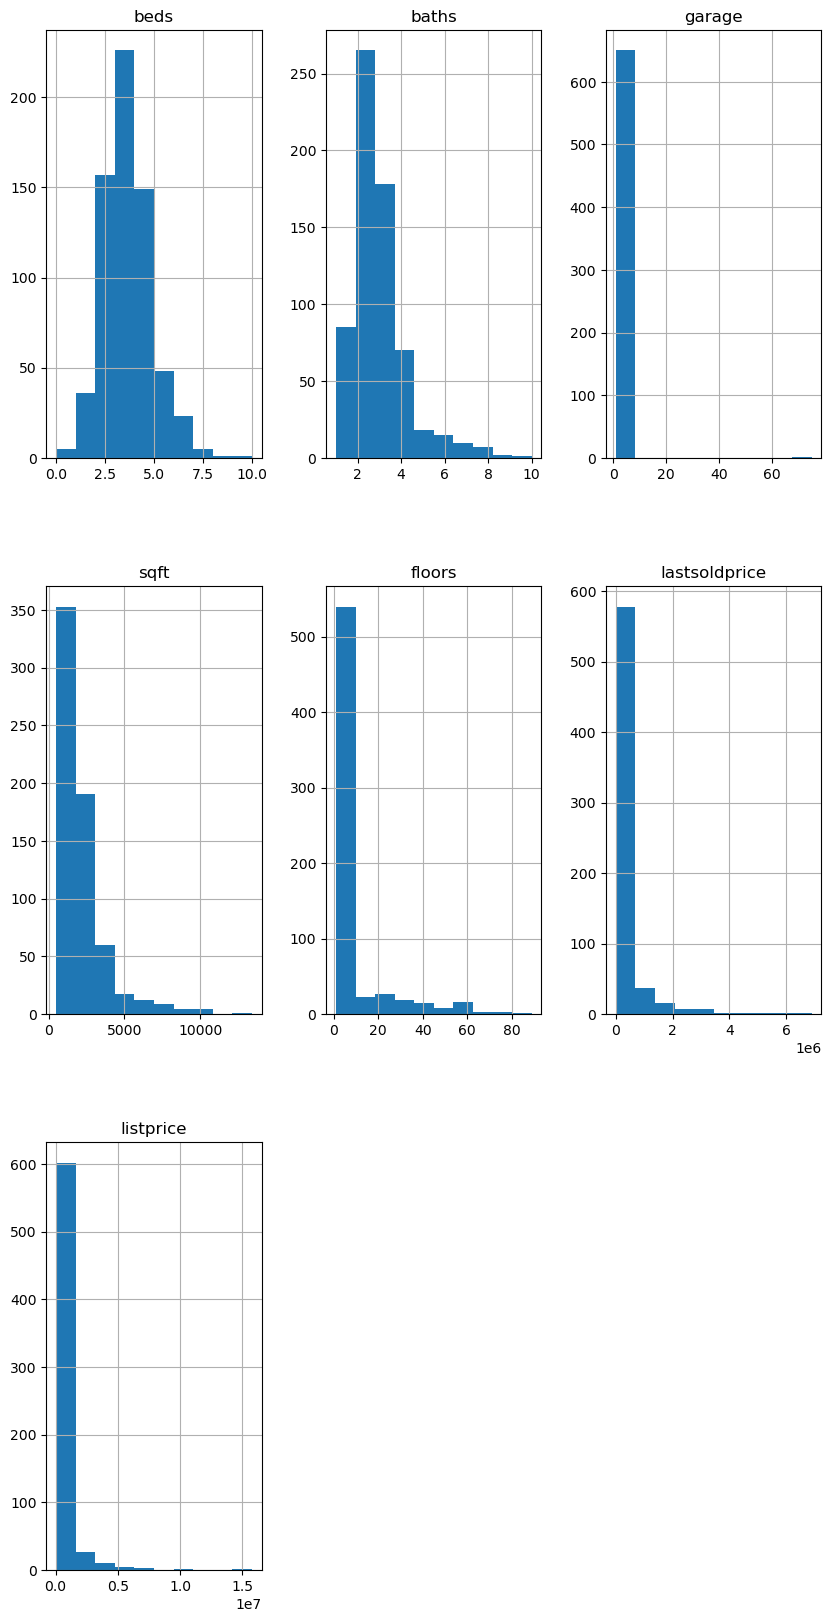

In [56]:
housedata.hist(figsize = (10,20))

In [57]:
colors = {
    "single_family" : "red",
    "townhomes" : "blue",
    "condos" : "green",
}

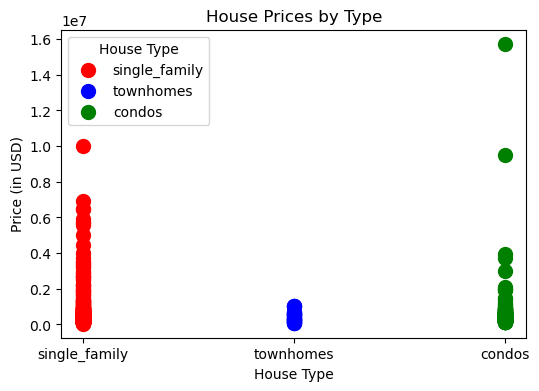

In [58]:
plt.figure(figsize = (6,4))
for type in colors:
    subset = housedata[housedata["type"] == type]
    plt.scatter(subset["type"], subset["listprice"], c = colors[type], label = type, s = 100)

plt.xlabel("House Type")
plt.ylabel("Price (in USD)")
plt.title("House Prices by Type")
plt.legend(title = "House Type")

plt.show()

/Users/matteomontrucchio/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


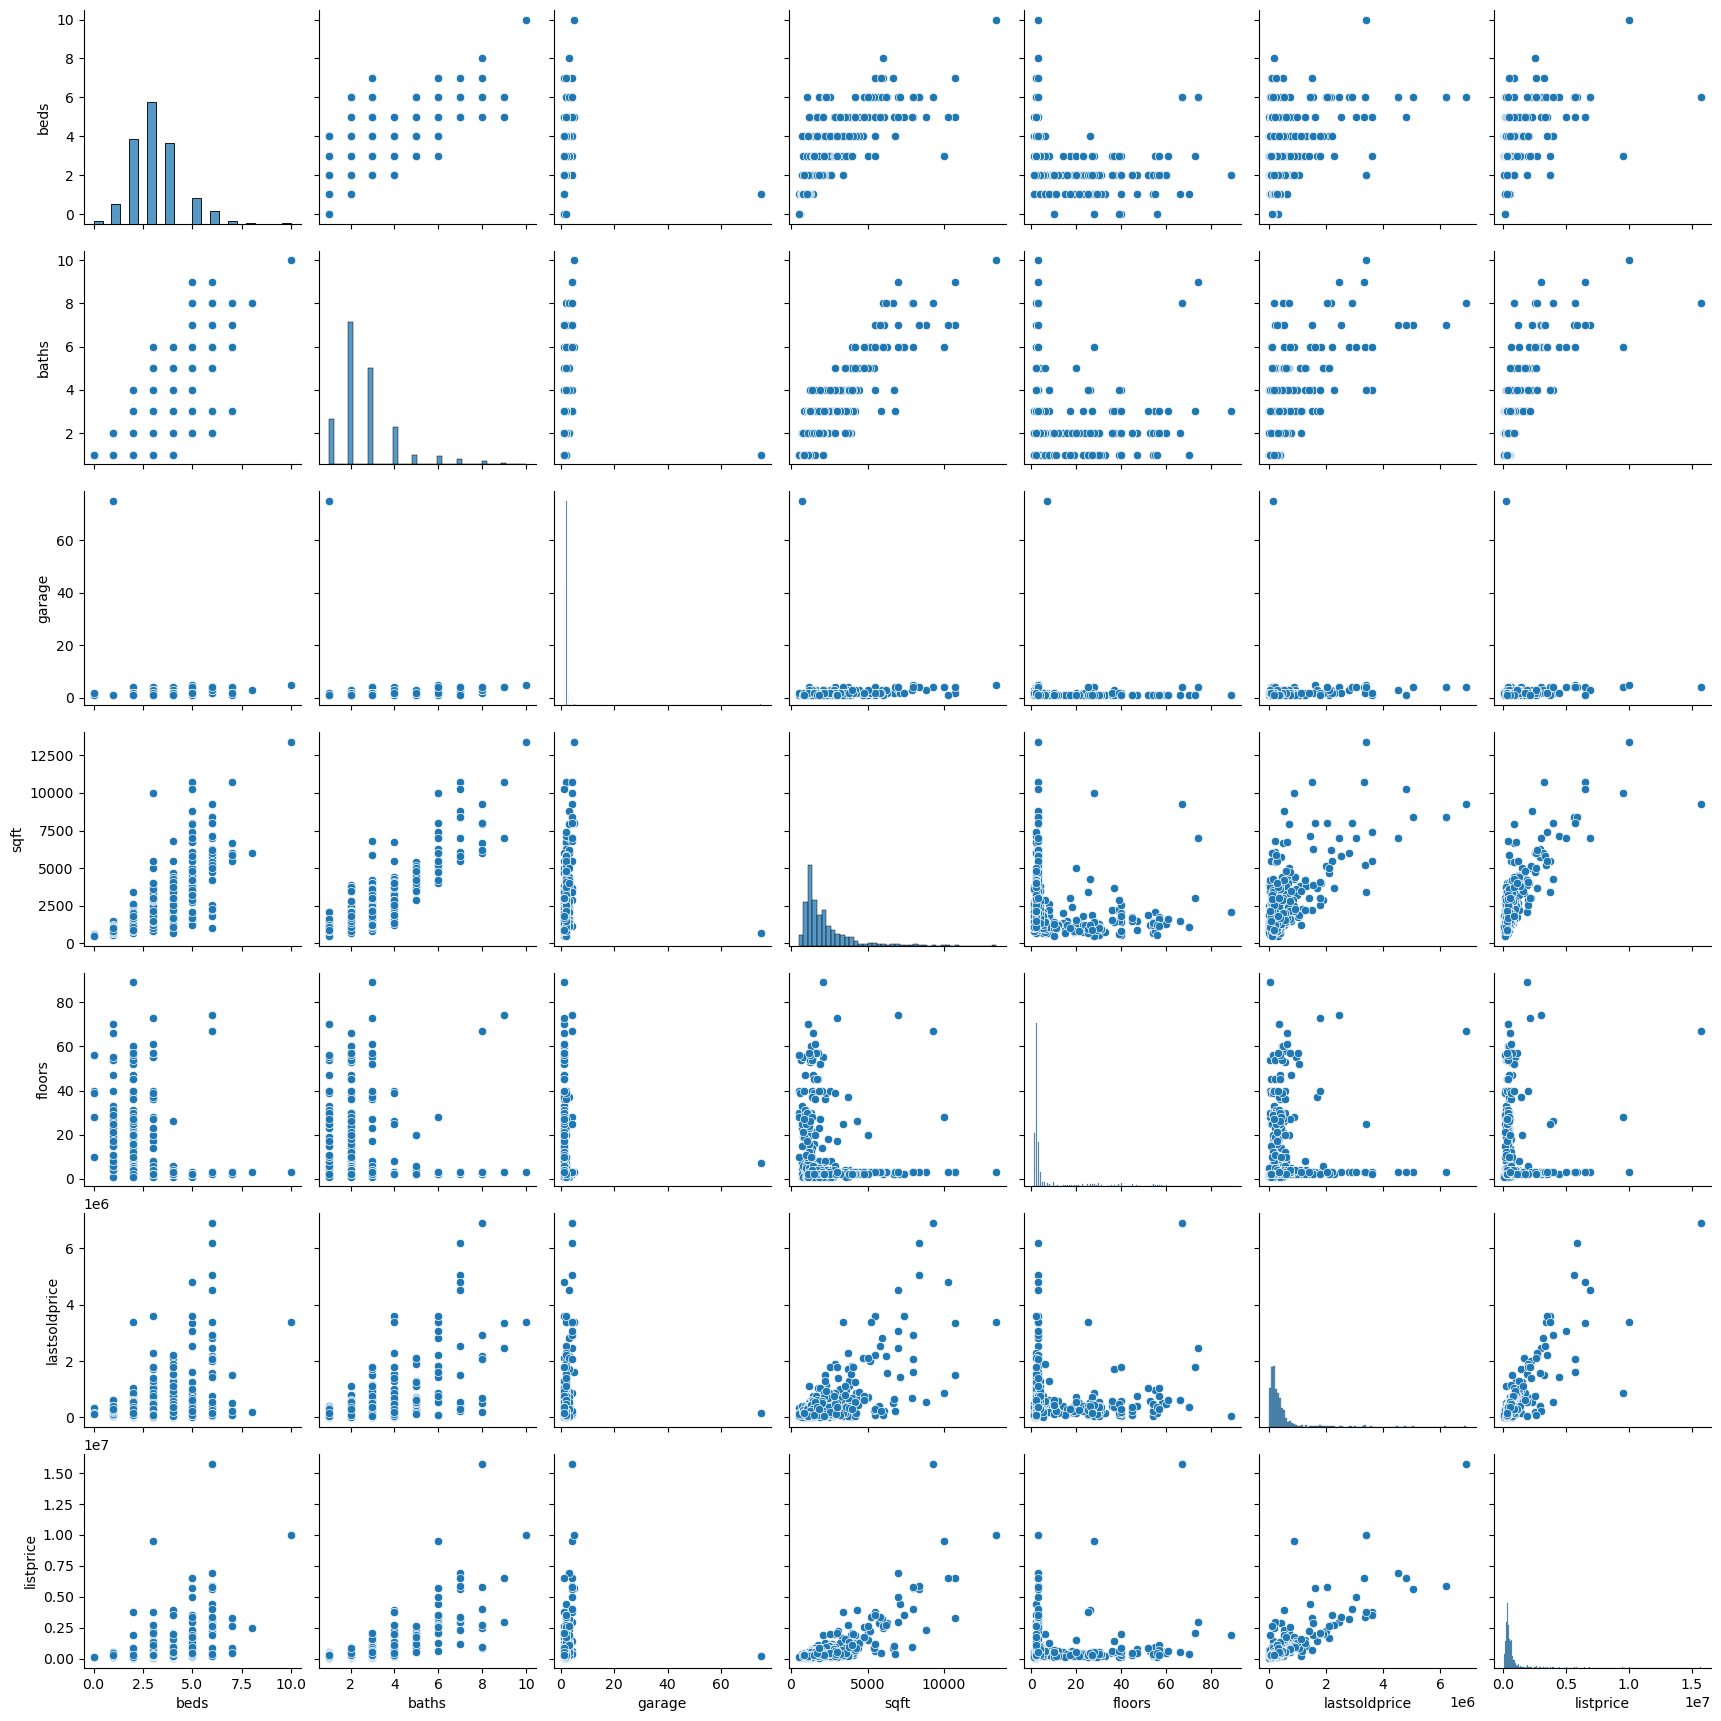

In [59]:
sns.pairplot(housedata)

,beds,baths,garage,sqft,floors,lastsoldprice,listprice
beds,1.000000,0.696898,0.058022,0.673588,-0.341807,0.338794,0.434614
baths,0.696898,1.000000,0.062684,0.866151,-0.106377,0.602457,0.684547
garage,0.058022,0.062684,1.000000,0.081165,-0.068755,0.055357,0.083918
sqft,0.673588,0.866151,0.081165,1.000000,-0.086706,0.661546,0.780948
floors,-0.341807,-0.106377,-0.068755,-0.086706,1.000000,0.130651,0.106946
lastsoldprice,0.338794,0.602457,0.055357,0.661546,0.130651,1.000000,0.835378
listprice,0.434614,0.684547,0.083918,0.780948,0.106946,0.835378,1.000000


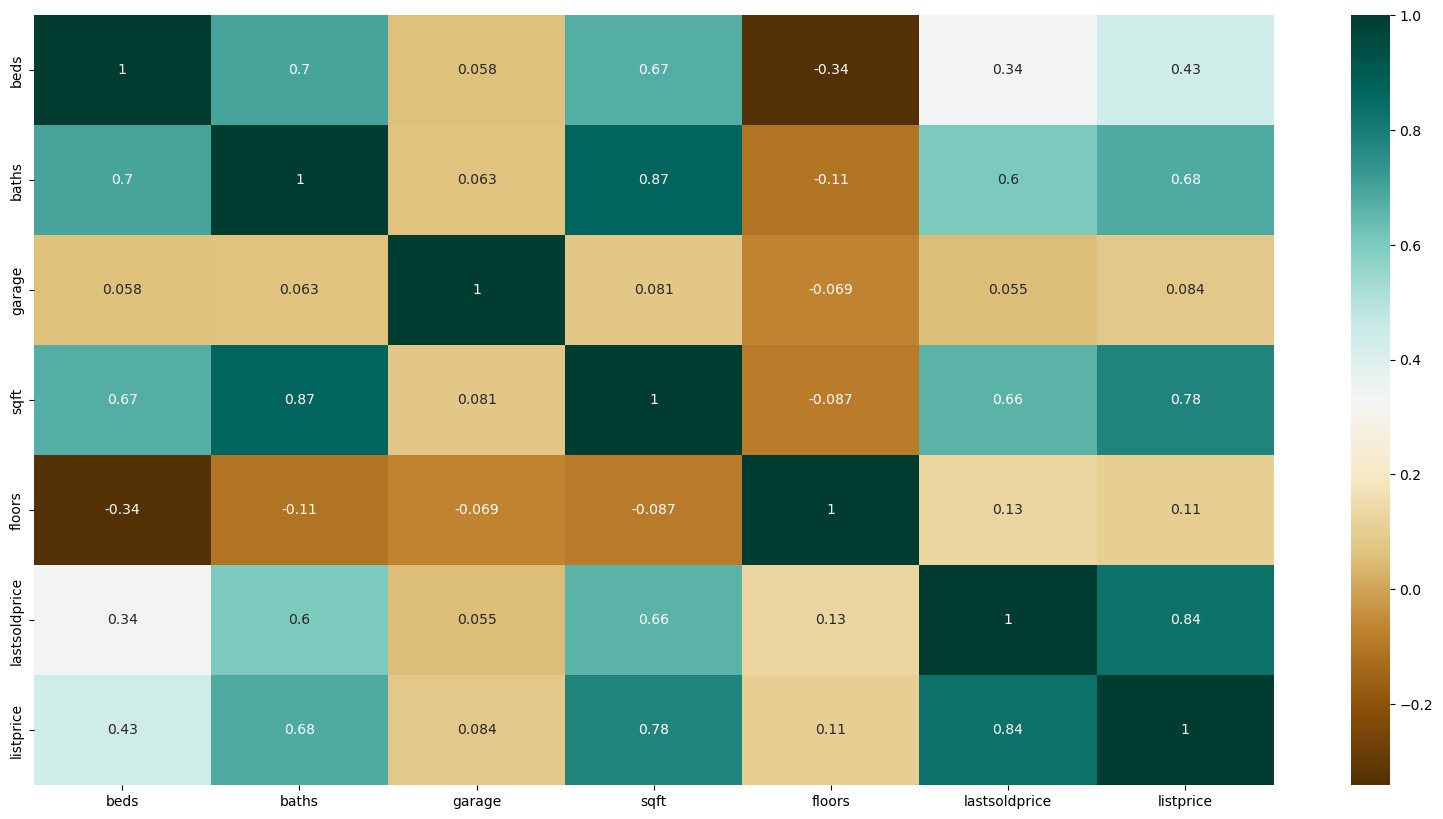

In [60]:
columnsno = ["type", "datesold", "status"]
housedatacorr = housedata.drop(columns = columnsno)
correlation = housedatacorr.corr()

plt.figure(figsize = (20,10))
sns.heatmap(correlation, cmap = "BrBG", annot = True)
correlation

<span style="color:green">PREDICTIVE ANALYTICS</span>

In [73]:
# linear regression
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [64]:
X = housedata[["beds", "baths", "sqft", "lastsoldprice"]]
y = housedata["listprice"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [66]:
reg_model1 = LinearRegression().fit(X_train, y_train)

In [69]:
print("Intercept (b0) is ", reg_model1.intercept_)
list(zip(X, reg_model1.coef_))

Intercept (b0) is  -172029.8861599213


[('beds', -82902.11574337647),
 ('baths', -36466.34511679452),
 ('sqft', 430.8942894043485),
 ('lastsoldprice', 0.6783219554818863)]

In [70]:
y_pred = reg_model1.predict(X_test)
x_pred = reg_model1.predict(X_train)

In [71]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 1.17919258e+05  2.88796723e+06  5.38573476e+05  1.79850657e+05
  5.00993521e+05  4.78007812e+05  1.82395828e+06  1.16044175e+05
  3.51510706e+05  4.59033756e+05  7.70502033e+06 -4.57713172e+04
  1.82083388e+05  6.69089014e+05  1.23118818e+05  5.16095988e+06
  2.59776073e+06  3.80175685e+05  9.26378555e+05  1.00546729e+06
  2.51643333e+05  5.22610449e+05  4.42107677e+05  1.75300169e+05
  4.78167041e+05 -3.68969892e+03  6.04155044e+04  1.29448209e+05
  2.23908103e+05  2.96848114e+05  1.86659246e+06  6.26942146e+05
  3.42701541e+05  5.64389805e+04  4.24388408e+05  4.82523825e+06
  1.01019864e+06  2.20216255e+05  1.16563881e+05  6.38712718e+04
  1.95489692e+05  3.68050913e+06  1.46384995e+05  4.51637177e+05
  9.24149813e+05 -8.86562749e+04  6.36008804e+05  8.12217256e+04
  1.68894947e+06  5.14688126e+05  7.96796965e+04  2.86358706e+05
  7.27986890e+05  1.69937540e+05  9.55757245e+05  1.09293876e+06
 -1.64524161e+05  5.62153156e+05  1.02115579e+06  2.61991538e+05


In [72]:
reg_model1_diff = pd.DataFrame({
    "Actual Value" : y_test,
    "Predicted Value" : y_pred
    })

reg_model1_diff

,Actual Value,Predicted Value
1416,113500.0,1.179193e+05
1618,2900000.0,2.887967e+06
1793,294999.0,5.385735e+05
58,179900.0,1.798507e+05
1706,415000.0,5.009935e+05
...,...,...
497,315000.0,3.676538e+05
201,169900.0,2.307972e+05
76,599000.0,8.438022e+05
289,389000.0,4.066824e+05


In [74]:
# it indicates the difference the absolute difference between the real and predicted values
mae = metrics.mean_absolute_error(y_test, y_pred)

# it indicates how far a point is from the regression line
mse = metrics.mean_squared_error(y_test, y_pred)

#the closer to zero the better
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [75]:
print(f"Mean Absolute Error --> {mae}")
print(f"Mean Square Error --> {mse}")
print(f"Root Mean Square Error --> {rmse}")

Mean Absolute Error --> 295549.13471621805
Mean Square Error --> 495757818278.5654
Root Mean Square Error --> 704100.7160048663


In [76]:
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.7566651023789365
